In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy import table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [55]:
def B_to_lat(B):
    return np.degrees(np.arcsin(B))

In [2]:
file = 'data/stats_table.csv'

df = pd.read_csv(file)

In [3]:
for s in df.columns:
    print(s)

ttest:in_transit&before_midtransit-vs-in_transit&after_midtransit
ks:in_transit-vs-out_of_transit
ttest:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit
ks:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit
kepid
ks:in_transit&before_midtransit-vs-in_transit&after_midtransit
ttest:in_transit-vs-out_of_transit
anderson:out_of_transit&before_midtransit-vs-out_of_transit&after_midtransit
anderson:in_transit&before_midtransit-vs-in_transit&after_midtransit
anderson:in_transit-vs-out_of_transit
A
AUPPER
ALOWER
UA
AREF
AURL
AR
ARUPPER
ARLOWER
UAR
ARREF
ARURL
ASTROMETRY
B
BUPPER
BLOWER
UB
BREF
BURL
BIGOM
BIGOMUPPER
BIGOMLOWER
UBIGOM
BIGOMREF
BIGOMURL
BINARY
BINARYREF
BINARYURL
BMV
CHI2
COMP
DATE
DEC
DEC_STRING
DENSITY
DENSITYUPPER
DENSITYLOWER
UDENSITY
DENSITYREF
DENSITYURL
DEPTH
DEPTHUPPER
DEPTHLOWER
UDEPTH
DEPTHREF
DEPTHURL
DIST
DISTUPPER
DISTLOWER
UDIST
DISTREF
DISTURL
DR
DRUPPER
DRLOWER
UDR
DRREF
DRURL
DVDT
DVDTUPPER
DVDTLOWER
UDVDT
DVDTREF
DVDTURL
EANA

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


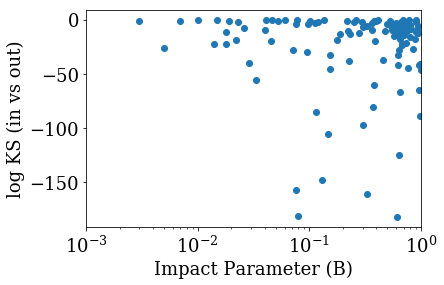

In [4]:
plt.scatter(df['B'], np.log10(df.iloc[:,1]))
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log KS (in vs out)')

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


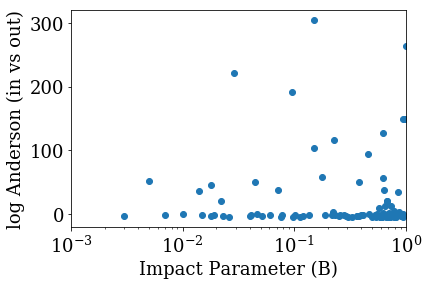

In [5]:
plt.scatter(df['B'], np.log10(df.iloc[:,9]))
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log Anderson (in vs out)')

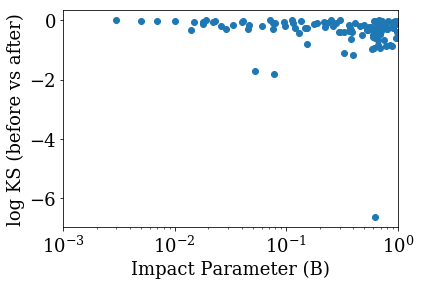

In [6]:
plt.scatter(df['B'], np.log10(df.iloc[:,3]))
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log KS (before vs after)')

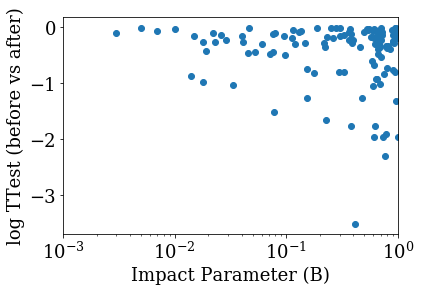

In [7]:
plt.scatter(df['B'], np.log10(df.iloc[:,2]))
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log TTest (before vs after)')

In [8]:
# cuts:
sum((np.log10(df.iloc[:,3]) > -1.5) & # KS before/after
    (np.log10(df.iloc[:,2]) > -0.7)) # TTest before/after

ok = (np.log10(df.iloc[:,3]) > -1.5) & (np.log10(df.iloc[:,2]) > -1)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


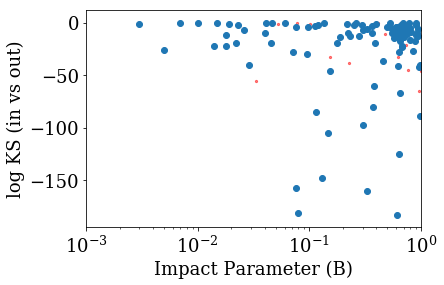

In [9]:
plt.scatter(df['B'], np.log10(df.iloc[:,1]), s=5, c='r',alpha=0.5)
plt.scatter(df['B'][ok], np.log10(df.iloc[:,1])[ok])
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log KS (in vs out)')

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


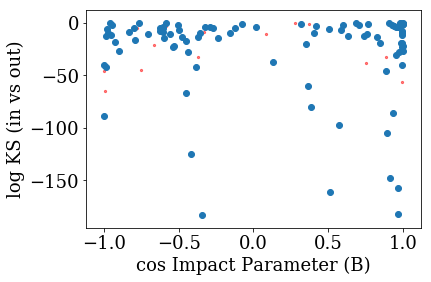

In [17]:
plt.scatter(np.cos(df['B']*np.pi), np.log10(df.iloc[:,1]), s=5, c='r',alpha=0.5)
plt.scatter(np.cos(df['B']*np.pi)[ok], np.log10(df.iloc[:,1])[ok])
plt.xlabel('cos Impact Parameter (B)')
plt.ylabel('log KS (in vs out)')

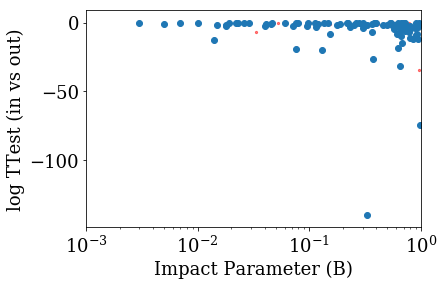

In [10]:
plt.scatter(df['B'], np.log10(df.iloc[:,6]), s=5, c='r',alpha=0.5)
plt.scatter(df['B'][ok], np.log10(df.iloc[:,6])[ok])
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log TTest (in vs out)')

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


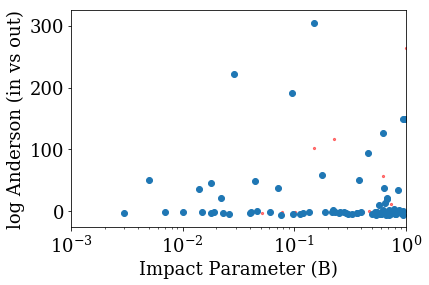

In [14]:
plt.scatter(df['B'], np.log10(df.iloc[:,9]), s=5, c='r',alpha=0.5)
plt.scatter(df['B'][ok], np.log10(df.iloc[:,9])[ok])
plt.xscale('log')
plt.xlim(1e-3,1)
plt.xlabel('Impact Parameter (B)')
plt.ylabel('log Anderson (in vs out)')


In [ ]:
# sum((np.log10(df.iloc[:,3]) > -1.5) & # KS before/after
#     (np.log10(df.iloc[:,2]) > -0.7)) # TTest before/after

# ok = (np.log10(df.iloc[:,3]) > -1.5) & (np.log10(df.iloc[:,2]) > -1)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


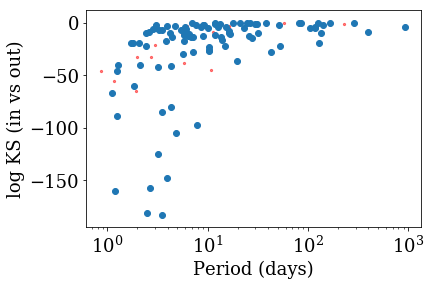

In [19]:
plt.scatter(df['PER'], np.log10(df.iloc[:,1]), s=5, c='r',alpha=0.5)
plt.scatter(df['PER'][ok], np.log10(df.iloc[:,1])[ok])

plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('log KS (in vs out)')

In [81]:
# ok10 = (np.log10(df.iloc[:,3]) > -2.5) & (np.log10(df.iloc[:,2]) > -1.7) & (df['PER'] >= 10)
ok20 = (np.log10(df.iloc[:,3]) > -2.5) & (np.log10(df.iloc[:,2]) > -1.7) & (df['PER'] >= 20)
sum(ok20)

27

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


(5, -50)

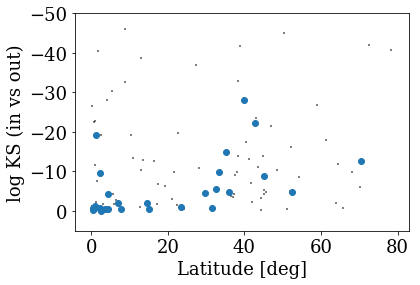

In [82]:
plt.scatter(B_to_lat(df['B']), np.log10(df.iloc[:,1]), s=5, c='k',alpha=0.5, marker='+')
# plt.scatter(B_to_lat(df['B'])[ok10], np.log10(df.iloc[:,1])[ok10])
plt.scatter(B_to_lat(df['B'])[ok20], np.log10(df.iloc[:,1])[ok20])

plt.xlabel('Latitude [deg]')
plt.ylabel('log KS (in vs out)')
plt.ylim(5,-50)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


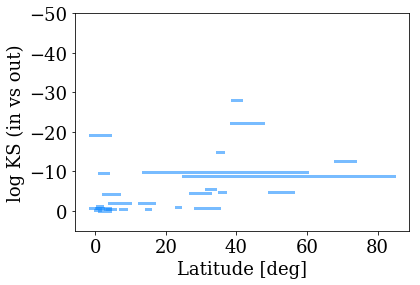

In [83]:
for k in range(sum(ok20)):
    plt.plot([B_to_lat(df['B'] - df['RR']/2.)[ok20].values[k], B_to_lat(df['B'] + df['RR']/2.)[ok20].values[k]],
             [np.log10(df.iloc[:,1])[ok20].values[k], np.log10(df.iloc[:,1])[ok20].values[k]], 
             c='DodgerBlue', lw=3, alpha=0.6)

plt.xlabel('Latitude [deg]')
plt.ylabel('log KS (in vs out)')
plt.ylim(5,-50);

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


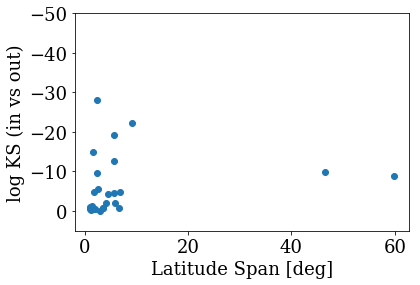

In [86]:
'''
does the span of latitudes sampled correlate with the scatter measured?

-> doesnt seem so, no
'''
plt.scatter(np.abs(B_to_lat(df['B'] - df['RR']/2.)[ok20] - B_to_lat(df['B'] + df['RR']/2.)[ok20]),
            np.log10(df.iloc[:,1])[ok20])
plt.xlabel('Latitude Span [deg]')
plt.ylabel('log KS (in vs out)')
plt.ylim(5,-50);
# plt.xlim(0,10)